In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pow, log10

In [76]:
data = pd.read_csv("includes/iris.data")
data['Lab'] = [(x[5:] == "setosa" and 1) or (x[5:] == "versicolor" and 2) or (x[5:] == "virginica" and 3) for x in data['Label']]
data.drop('Label', axis=1, inplace=True)

In [111]:
# Code should result in 3 outputs between 1 and 0 each showing probability for a certain iris
# f(x1) = c1x1^3 + c2x1^2 + c3x1 + b1
# f(x2) = c4x^3 + c5x^2 + c6x + b2
# f(x3) = c7x^3 + c8x^2 + c9x + b3
# Expected Y = 1/1 + e ^-f(x)
# For 1 feature Extended to 4 features following 12 vars of weight for each
# Matrix of (1, 12) for features and (12, 3) for weights, (3, 1) for b


# Generating the weights matrix
weights = 0.05 * np.random.normal(0, 1, (12, 3))
b_vals = 0.1 * np.random.normal(0, 1, (1, 3))

learning_rates =  np.array([0.0001, 0.0001, 0.0001]).reshape((3, 1))
learning_rates_b = np.array([0.005, 0.005, 0.005]).reshape((1, 3))
print("Chosen Weight are:")
print(weights)
print("Chosen values for b are:")
print(b_vals)
print("Chosen learning rates are:")
print(learning_rates)
print("Chosen learning rate for b are:")
print(learning_rates_b)

Chosen Weight are:
[[-0.08911793 -0.01135117 -0.04767855]
 [ 0.02273627  0.01782916  0.05139935]
 [ 0.05422267 -0.02372262  0.10418976]
 [-0.00511813 -0.02855694 -0.05315163]
 [ 0.0631616   0.06458782 -0.06214416]
 [-0.08068208 -0.07707788 -0.02666926]
 [-0.01865537 -0.0468422   0.09103106]
 [-0.05218057 -0.04011871  0.10166778]
 [ 0.03669543  0.04464036  0.02282969]
 [-0.04227999  0.05282819  0.01606682]
 [-0.01185817 -0.02148434 -0.0246026 ]
 [-0.01832248  0.09382687  0.00912084]]
Chosen values for b are:
[[0.07888071 0.11528928 0.07390581]]
Chosen learning rates are:
[[0.0001]
 [0.0001]
 [0.0001]]
Chosen learning rate for b are:
[[0.005 0.005 0.005]]


In [112]:
ideal_vals = {
    '1': [1, 0, 0],
    '2': [0, 1, 0],
    '3': [0, 0, 1]
}

def getExpected():
    for row in data.to_numpy():
        arr = np.array([[row[i], pow(row[i], 2), pow(row[i], 3)] for i in range(4)]).reshape(1, 12)
        yield np.array(list(pow(1 + x, -1) for x in np.exp(-(np.dot(arr, weights) + b_vals)).reshape(3, 1)))

def correctionWeightsTerms():
    total = np.zeros((12, 3))
    for expected, actual in zip(getExpected(), data.to_numpy()):
        temp = expected - ideal_vals[str(int(actual[4]))]
        k = 0
        for i in range(4):
            for j in range(1, 4):
                total[k] += temp * pow(actual[i], j)
                k += 1
    total /= len(data)
    return total

def correctionBTerms():
    total = np.zeros((1, 3))
    for expected, actual in zip(getExpected(), data.to_numpy()):
        total += expected - ideal_vals[str(int(actual[4]))]
    total /= len(data)
    return total

def calcCost():
    # Sum of All Losses
    # 3 Losses Calculated and added up
    total = 0
    for expected, actual in zip(getExpected(), data['Lab']):
        try:
            total += sum(y * log10(x) + (1 - y) * log10(1 - x) for x, y in zip(expected, ideal_vals[str(int(actual))]))
        except ValueError:
            total -= 10000000000
    total /= -len(data['Lab'])
    return total


[[ 4.14676008e-04 -9.52979371e-05  3.64729062e-04  2.62978786e-03
  -5.23478473e-04  2.02261419e-03  1.68560080e-02 -2.82630589e-03
   1.13702134e-02  1.89501321e-04 -4.58720008e-05  2.06263697e-04]
 [ 5.50513173e-04 -1.23782421e-04  6.53137364e-04  1.61932157e-03
  -3.36523310e-04  2.11468134e-03  3.26241753e-04 -5.62398643e-05
   1.90798781e-04  1.64836472e-03 -1.41087123e-04  6.84558412e-04]
 [ 8.53854530e-03 -2.15262245e-05  2.77609389e-03  1.11598729e-04
  -1.38420501e-05  5.23331565e-05  1.99133665e-04  6.58641048e-07
   6.22466295e-05  3.74867987e-04  4.21099211e-05  8.35953242e-05]]
[[ 0.0033041  -0.00085821  0.00333329]]


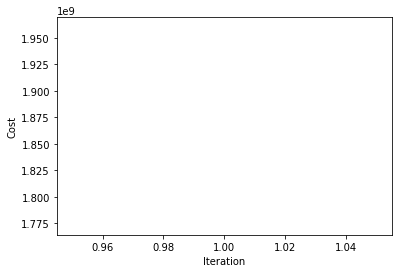

[[ 3.96817181e-04 -4.77307707e-05  3.64719622e-04  2.54065577e-03
  -2.12560193e-04  2.02257145e-03  1.64088232e-02 -7.70554583e-04
   1.13700195e-02  1.76938674e-04 -2.41744276e-05  2.06257124e-04]
 [ 5.06003252e-04 -5.89892849e-05  6.53116537e-04  1.45941970e-03
  -1.40446963e-04  2.11461486e-03  3.20862325e-04 -1.75654040e-05
   1.90796067e-04  1.63981929e-03  6.83821753e-05  6.84554810e-04]
 [ 8.52336590e-03  1.13662926e-03  2.77608898e-03  1.10653368e-04
  -2.60339660e-07  5.23327530e-05  1.98776059e-04  2.72055619e-05
   6.22465401e-05  3.74638470e-04  9.58759911e-05  8.35952999e-05]]
[[ 0.00312425 -0.00048993  0.00333318]]


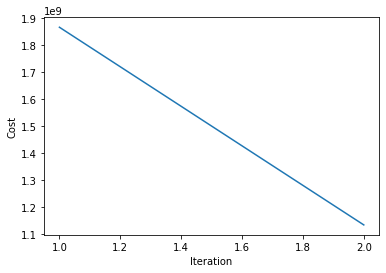

[[ 3.19781741e-04 -4.42052182e-05  3.64688021e-04  2.14387184e-03
  -1.90360172e-04  2.02242701e-03  1.43521218e-02 -6.28629367e-04
   1.13693574e-02  1.25505685e-04 -2.25310286e-05  2.06235108e-04]
 [ 3.27221856e-04 -5.41721547e-05  6.53046037e-04  8.28132057e-04
  -1.26127706e-04  2.11438731e-03  2.93992344e-04 -1.49610107e-05
   1.90786936e-04  1.57944849e-03  8.12019182e-05  6.84542479e-04]
 [ 8.34310656e-03  1.20221354e-03  2.77607181e-03  1.04852943e-04
   6.18492098e-07  5.23313697e-05  1.94152614e-04  2.87569177e-05
   6.22462183e-05  3.68568633e-04  9.87921731e-05  8.35952045e-05]]
[[ 0.00237176 -0.00046148  0.00333283]]


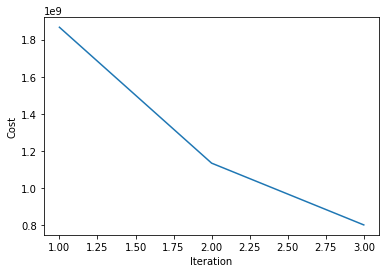

[[ 5.88591170e-05 -4.37723371e-05  3.64577991e-04  5.83055807e-04
  -1.88390650e-04  2.02191796e-03  4.87158938e-03 -6.20499836e-04
   1.13669943e-02 -8.83020900e-06 -2.23001411e-05  2.06158389e-04]
 [-8.66881139e-05 -5.35847946e-05  6.52797153e-04 -4.67398052e-04
  -1.24645043e-04  2.11357284e-03  1.17939073e-04 -1.48662667e-05
   1.90754951e-04  7.65443468e-04  8.05062517e-05  6.84498395e-04]
 [ 4.30917603e-03  1.19361954e-03  2.77600886e-03  4.67179613e-05
   6.14415495e-07  5.23264268e-05  9.42058260e-05  2.85908032e-05
   6.22450000e-05  1.80515557e-04  9.82462172e-05  8.35948051e-05]]
[[ 0.00015628 -0.00045694  0.00333164]]


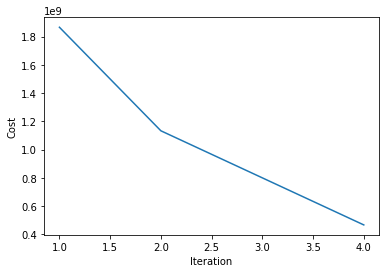

[[-9.38242439e-05 -4.33749749e-05  3.64176052e-04 -4.02580543e-04
  -1.86688685e-04  2.02002998e-03 -1.57980149e-03 -6.14337183e-04
   1.13580905e-02 -7.87083455e-05 -2.20825401e-05  2.05877874e-04]
 [-2.92874000e-04 -5.30369650e-05  6.51872044e-04 -1.08383255e-03
  -1.23281050e-04  2.11049216e-03  1.10321478e-06 -1.48111782e-05
   1.90637363e-04  1.58472531e-04  7.95561306e-05  6.84332422e-04]
 [ 1.03921278e-03  1.18348653e-03  2.77576466e-03  7.59344969e-06
   5.95042547e-07  5.23078515e-05  2.29651034e-05  2.83903442e-05
   6.22400953e-05  4.37390625e-05  9.76255685e-05  8.35930092e-05]]
[[-0.0010438  -0.00045263  0.00332735]]


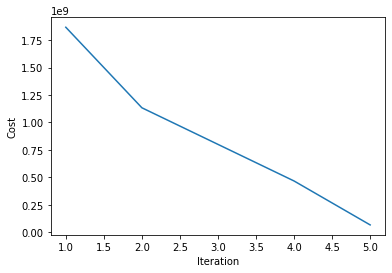

[[-7.37551881e-05 -4.29628234e-05  3.62627996e-04 -2.77805384e-04
  -1.84926535e-04  2.01261933e-03 -7.89772963e-04 -6.07981083e-04
   1.13224520e-02 -6.91845537e-05 -2.18550431e-05  2.04796093e-04]
 [-2.64893583e-04 -5.24589697e-05  6.48229325e-04 -1.00042446e-03
  -1.21823342e-04  2.09809090e-03  1.51689918e-05 -1.47554484e-05
   1.90181629e-04  2.26704569e-04  7.85671680e-05  6.83671124e-04]
 [ 1.39151469e-03  1.17299425e-03  2.77475624e-03  1.20962218e-05
   5.74483072e-07  5.22340106e-05  3.05573566e-05  2.81828417e-05
   6.22189523e-05  5.75582251e-05  9.69851073e-05  8.35842556e-05]]
[[-0.00087927 -0.00044814  0.0033111 ]]


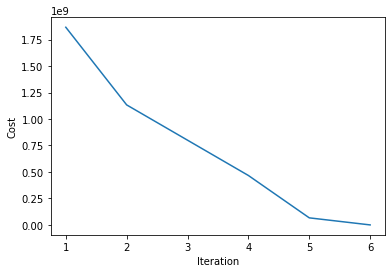

[[-6.82243577e-05 -4.25357233e-05  3.56440532e-04 -2.46052422e-04
  -1.83103649e-04  1.98230061e-03 -6.04270013e-04 -6.01430250e-04
   1.11731451e-02 -6.62476923e-05 -2.16174275e-05  2.00466959e-04]
 [-2.55942544e-04 -5.18498270e-05  6.33275013e-04 -9.72688046e-04
  -1.20267964e-04  2.04579380e-03  1.82628756e-05 -1.46992071e-05
   1.88349787e-04  2.38620450e-04  7.75383924e-05  6.80923076e-04]
 [ 1.44202576e-03  1.16213797e-03  2.77035954e-03  1.29965988e-05
   5.52663618e-07  5.19274688e-05  3.17714024e-05  2.79681518e-05
   6.21219053e-05  5.94104799e-05  9.63245755e-05  8.35375046e-05]]
[[-0.00083023 -0.0004435   0.00324765]]


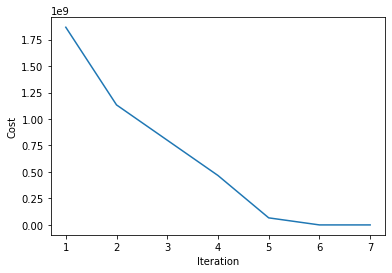

[[-6.62316115e-05 -4.20935747e-05  3.33617720e-04 -2.37035574e-04
  -1.81219776e-04  1.86761190e-03 -5.67022251e-04 -5.94684878e-04
   1.05938574e-02 -6.49049166e-05 -2.13694997e-05  1.84547535e-04]
 [-2.51591619e-04 -5.12086271e-05  5.76993287e-04 -9.58381934e-04
  -1.18611134e-04  1.84414815e-03  1.86694983e-05 -1.46426082e-05
   1.81538132e-04  2.36737901e-04  7.64688281e-05  6.70186349e-04]
 [ 1.41885731e-03  1.15091342e-03  2.75155558e-03  1.30107986e-05
   5.29506001e-07  5.07309535e-05  3.14160512e-05  2.77461371e-05
   6.16800506e-05  5.83239087e-05  9.56437488e-05  8.32646881e-05]]
[[-0.00080915 -0.00043868  0.0030194 ]]


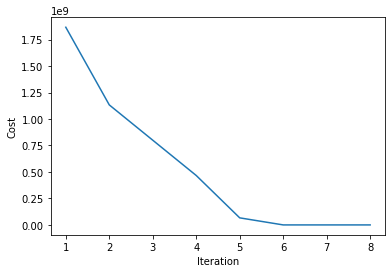

[[-6.45145096e-05 -4.16363204e-05  2.80779127e-04 -2.29846541e-04
  -1.79274847e-04  1.59712264e-03 -5.41919350e-04 -5.87745834e-04
   9.20152998e-03 -6.36688934e-05 -2.11110893e-05  1.48613072e-04]
 [-2.47509493e-04 -5.05345156e-05  4.50757582e-04 -9.44727456e-04
  -1.16849196e-04  1.39457620e-03  1.88360077e-05 -1.45858117e-05
   1.64870623e-04  2.33619854e-04  7.53575963e-05  6.39414095e-04]
 [ 1.38942774e-03  1.13931737e-03  2.67960683e-03  1.29423281e-05
   5.04933758e-07  4.75251570e-05  3.09175906e-05  2.75166804e-05
   5.99086167e-05  5.69829486e-05  9.49424656e-05  8.14535910e-05]]
[[-0.00079015 -0.00043369  0.00250048]]


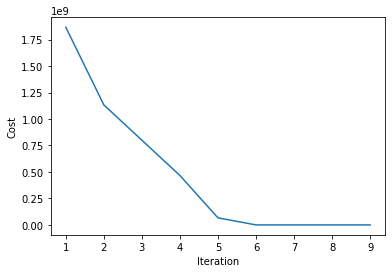

[[-6.28055109e-05 -4.11639498e-05  2.12769369e-04 -2.22758990e-04
  -1.77268993e-04  1.23284260e-03 -5.17654630e-04 -5.80614710e-04
   7.22732812e-03 -6.24186362e-05 -2.08420518e-05  1.06909699e-04]
 [-2.43343766e-04 -4.98267038e-05  3.12876523e-04 -9.30683814e-04
  -1.14978653e-04  9.31126367e-04  1.89655069e-05 -1.45289837e-05
   1.34864040e-04  2.30319874e-04  7.42039291e-05  5.44273488e-04]
 [ 1.35943138e-03  1.12734776e-03  2.30187822e-03  1.28581659e-05
   4.78872997e-07  3.96971296e-05  3.03958810e-05  2.72796872e-05
   5.04073176e-05  5.56143074e-05  9.42206337e-05  6.62885149e-05]]
[[-0.00077113 -0.00042853  0.00185854]]


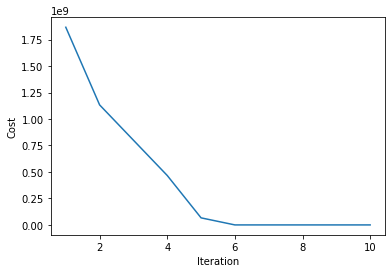

[[-6.10948010e-05 -4.06765017e-05  8.82263408e-05 -2.15693150e-04
  -1.75202554e-04  4.73832796e-04 -4.93611380e-04 -5.73293856e-04
   2.52689967e-03 -6.11514869e-05 -2.05622717e-05  4.41514959e-05]
 [-2.39087936e-04 -4.90844801e-05  1.20466393e-04 -9.16234908e-04
  -1.12996216e-04  3.32594755e-04  1.90697942e-05 -1.44722942e-05
   4.89107584e-05  2.26915507e-04  7.30071858e-05  1.39880191e-04]
 [ 1.32934226e-03  1.11500377e-03  2.79380414e-04  1.27626789e-05
   4.51253380e-07  1.13124091e-05  2.98602027e-05  2.70350888e-05
   1.69374222e-06  5.42371228e-05  9.34782374e-05 -2.45593844e-05]]
[[-0.00075202 -0.0004232   0.00081963]]


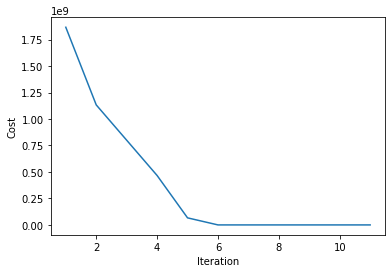

[[-5.93893573e-05 -4.01740669e-05  1.72832083e-05 -2.08676568e-04
  -1.73076092e-04  2.04795706e-05 -4.69871949e-04 -5.65786415e-04
  -4.10006693e-04 -5.98726579e-05 -2.02716651e-05  1.06206420e-05]
 [-2.34758989e-04 -4.83072209e-05  1.92848154e-05 -9.01435881e-04
  -1.10898837e-04  2.32219975e-05  1.91485378e-05 -1.44159162e-05
  -4.55571315e-06  2.23421620e-04  7.17668693e-05 -1.31937160e-04]
 [ 1.29928969e-03  1.10228594e-03 -1.15515507e-03  1.26563140e-05
   4.22009122e-07 -6.84061002e-06  2.93128107e-05  2.67828450e-05
  -3.13796215e-05  5.28570649e-05  9.27153437e-05 -8.84352177e-05]]
[[-0.00073291 -0.0004177   0.0002565 ]]


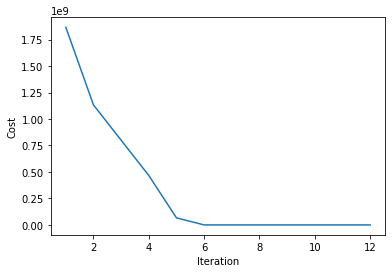

[[-5.76968958e-05 -3.96567916e-05  4.26943105e-05 -2.01742195e-04
  -1.70890398e-04  1.85592365e-04 -4.46559877e-04 -5.58096347e-04
   6.75460849e-04 -5.85877924e-05 -1.99701831e-05  2.23603027e-05]
 [-2.30375601e-04 -4.74944018e-05  5.45452554e-05 -8.86348415e-04
  -1.08683758e-04  1.30459122e-04  1.92010077e-05 -1.43600243e-05
   1.54292082e-05  2.19849528e-04  7.04826411e-05 -2.68198581e-05]
 [ 1.26937196e-03  1.08919629e-03 -5.86994918e-04  1.25394173e-05
   3.91079998e-07  5.50035490e-08  2.87556114e-05  2.65229471e-05
  -1.83981470e-05  5.14787871e-05  9.19321094e-05 -6.28175280e-05]]
[[-0.00071389 -0.00041203  0.00045443]]


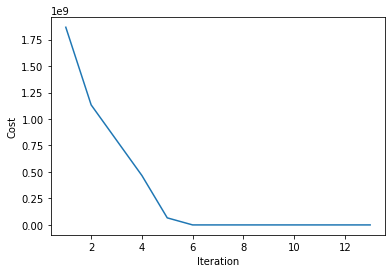

[[-5.60245751e-05 -3.91248792e-05  3.11593694e-05 -1.94920433e-04
  -1.68646503e-04  1.12847352e-04 -4.23789820e-04 -5.50228450e-04
   2.09823955e-04 -5.73023192e-05 -1.96578138e-05  1.68513339e-05]
 [-2.25956192e-04 -4.66456095e-05  3.79860357e-05 -8.71034788e-04
  -1.06348552e-04  8.00140055e-05  1.92269100e-05 -1.43047925e-05
   7.05978676e-06  2.16210999e-04  6.91543366e-05 -6.79772210e-05]
 [ 1.23967778e-03  1.07573835e-03 -7.98782639e-04  1.24124914e-05
   3.58412332e-07 -2.73284352e-06  2.81905987e-05  2.62554197e-05
  -2.32855775e-05  5.01067455e-05  9.11287860e-05 -7.19882647e-05]]
[[-0.00069502 -0.0004062   0.00036152]]


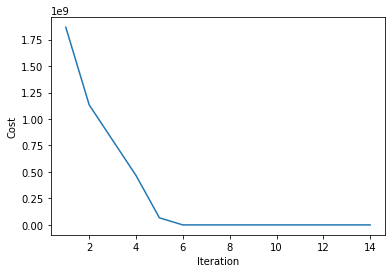

[[-5.43787915e-05 -3.85785927e-05  3.49340879e-05 -1.88238038e-04
  -1.66345684e-04  1.38526810e-04 -4.01661325e-04 -5.42188377e-04
   3.85188879e-04 -5.60213159e-05 -1.93345858e-05  1.85094137e-05]
 [-2.21518458e-04 -4.57605524e-05  4.29880955e-05 -8.55556286e-04
  -1.03891168e-04  9.52773451e-05  1.92264297e-05 -1.42503932e-05
   1.04002224e-05  2.12518382e-04  6.77819788e-05 -4.89233624e-05]
 [ 1.21028770e-03  1.06191733e-03 -6.90389067e-04  1.22761950e-05
   3.23959955e-07 -1.52371717e-06  2.76198491e-05  2.59803241e-05
  -2.08150720e-05  4.87452151e-05  9.03057254e-05 -6.68554948e-05]]
[[-0.0006764  -0.0004002   0.00038931]]


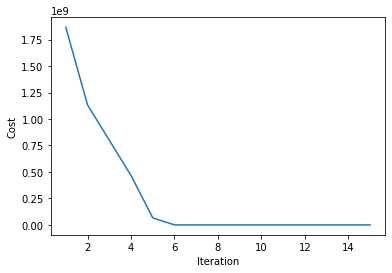

[[-5.27651054e-05 -3.80182562e-05  3.26343698e-05 -1.81717796e-04
  -1.63989470e-04  1.25049340e-04 -3.80257145e-04 -5.33982644e-04
   3.04961019e-04 -5.47494363e-05 -1.90005700e-05  1.73370081e-05]
 [-2.17079091e-04 -4.48390720e-05  3.94884005e-05 -8.39972138e-04
  -1.01309975e-04  8.46748567e-05  1.92001903e-05 -1.41969954e-05
   9.05873854e-06  2.08784391e-04  6.63657907e-05 -5.40581032e-05]
 [ 1.18127422e-03  1.04774010e-03 -7.10968094e-04  1.21313159e-05
   2.87685095e-07 -1.91709160e-06  2.70454793e-05  2.56977590e-05
  -2.13067065e-05  4.73982453e-05  8.94633830e-05 -6.74945561e-05]]
[[-0.00065807 -0.00039404  0.00036936]]


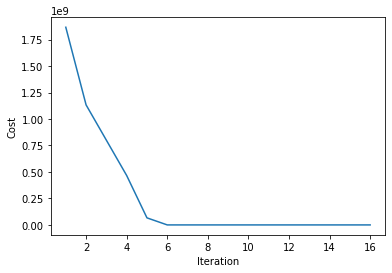

[[-5.11882178e-05 -3.74442566e-05  3.27634322e-05 -1.75378460e-04
  -1.61579647e-04  1.27142261e-04 -3.59642899e-04 -5.25618628e-04
   3.25877882e-04 -5.34908658e-05 -1.86558821e-05  1.73058116e-05]
 [-2.12653575e-04 -4.38811529e-05  3.94244246e-05 -8.24338675e-04
  -9.86038041e-05  8.45520656e-05  1.91491924e-05 -1.41447634e-05
   9.56154511e-06  2.05021849e-04  6.49062059e-05 -4.97687002e-05]
 [ 1.15270178e-03  1.03321529e-03 -6.81673122e-04  1.19787392e-05
   2.49559189e-07 -1.68240467e-06  2.64695992e-05  2.54078629e-05
  -2.06485742e-05  4.60696122e-05  8.86023215e-05 -6.59069068e-05]]
[[-0.0006401  -0.00038772  0.00036863]]


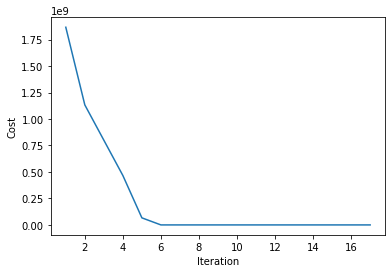

[[-4.96519819e-05 -3.68570443e-05  3.19913745e-05 -1.69234851e-04
  -1.59118255e-04  1.23379702e-04 -3.39867581e-04 -5.17104561e-04
   3.08315867e-04 -5.22492996e-05 -1.83006849e-05  1.68599400e-05]
 [-2.08256047e-04 -4.28869325e-05  3.81188887e-05 -8.08708677e-04
  -9.57719882e-05  8.06648484e-05  1.90747431e-05 -1.40938549e-05
   9.35377849e-06  2.01243425e-04  6.34038773e-05 -4.92029366e-05]
 [ 1.12462685e-03  1.01835333e-03 -6.72396832e-04  1.18194143e-05
   2.09563587e-07 -1.69302280e-06  2.58942665e-05  2.51108152e-05
  -2.04497944e-05  4.47627763e-05  8.77232119e-05 -6.52213346e-05]]
[[-0.00062252 -0.00038125  0.00036087]]


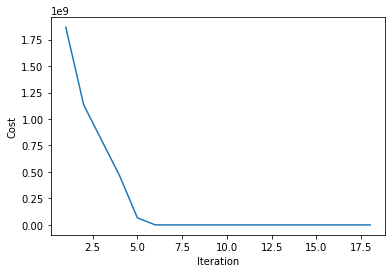

[[-4.81594406e-05 -3.62571334e-05  3.15882215e-05 -1.63298090e-04
  -1.56607595e-04  1.21939275e-04 -3.20964684e-04 -5.08449513e-04
   3.05594431e-04 -5.10279369e-05 -1.79351892e-05  1.65919106e-05]
 [-2.03899217e-04 -4.18567095e-05  3.73518928e-05 -7.93130903e-04
  -9.28144018e-05  7.84308393e-05  1.89783824e-05 -1.40444200e-05
   9.41208872e-06  1.97461395e-04  6.18596833e-05 -4.73305586e-05]
 [ 1.09709814e-03  1.00316642e-03 -6.56396371e-04  1.16543235e-05
   1.67690140e-07 -1.61478401e-06  2.53214462e-05  2.48068361e-05
  -2.00943065e-05  4.34808470e-05  8.68268339e-05 -6.42397644e-05]]
[[-0.00060539 -0.00037463  0.0003561 ]]


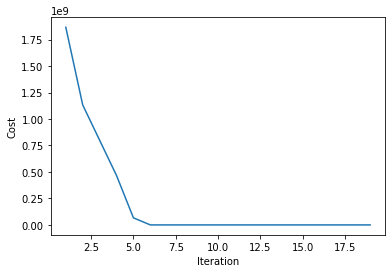

[[-4.67128826e-05 -3.56451015e-05  3.10775403e-05 -1.57575909e-04
  -1.54050217e-04  1.19757851e-04 -3.02953705e-04 -4.99663368e-04
   2.97768070e-04 -4.98294904e-05 -1.75596556e-05  1.62788806e-05]
 [-1.99594334e-04 -4.07909514e-05  3.64532834e-05 -7.77649765e-04
  -8.97314930e-05  7.58081807e-05  1.88618134e-05 -1.39966001e-05
   9.37146931e-06  1.93687432e-04  6.02747311e-05 -4.60261995e-05]
 [ 1.07015675e-03  9.87668569e-04 -6.43617932e-04  1.14844534e-05
   1.23941634e-07 -1.57246109e-06  2.47529762e-05  2.44961875e-05
  -1.98116679e-05  4.22265556e-05  8.59140746e-05 -6.34081006e-05]]
[[-0.00058872 -0.00036788  0.00035055]]


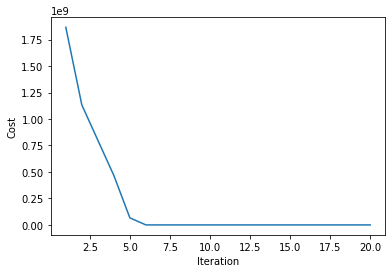

[[-4.53139087e-05 -3.50215890e-05  3.06315614e-05 -1.52073006e-04
  -1.51448925e-04  1.17947054e-04 -2.85841853e-04 -4.90756786e-04
   2.92098714e-04 -4.86562056e-05 -1.71743952e-05  1.60008256e-05]
 [-1.95351186e-04 -3.96903004e-05  3.56628917e-05 -7.62305157e-04
  -8.65243138e-05  7.35253979e-05  1.87268385e-05 -1.39505264e-05
   9.36532786e-06  1.89932436e-04  5.86503578e-05 -4.46004253e-05]
 [ 1.04383654e-03  9.71875559e-04 -6.30391854e-04  1.13107709e-05
   7.83320839e-08 -1.52028734e-06  2.41905408e-05  2.41791721e-05
  -1.95172841e-05  4.10022398e-05  8.49859258e-05 -6.25616511e-05]]
[[-0.00057254 -0.00036099  0.00034557]]


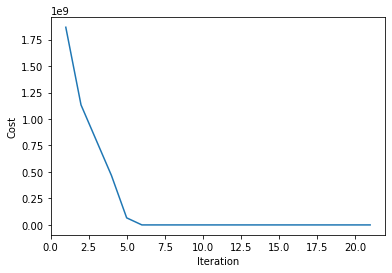

[[-4.39635050e-05 -3.43872973e-05  3.01873866e-05 -1.46791418e-04
  -1.48806757e-04  1.16104847e-04 -2.69625814e-04 -4.81741156e-04
   2.85981862e-04 -4.75098882e-05 -1.67797697e-05  1.57280343e-05]
 [-1.91178141e-04 -3.85555775e-05  3.48910442e-05 -7.47132390e-04
  -8.31945436e-05  7.13081873e-05  1.85753035e-05 -1.39063192e-05
   9.34621890e-06  1.86206408e-04  5.69881277e-05 -4.32942607e-05]
 [ 1.01816441e-03  9.55804879e-04 -6.17987708e-04  1.11342035e-05
   3.08868524e-08 -1.47440795e-06  2.36356523e-05  2.38561320e-05
  -1.92406111e-05  3.98098376e-05  8.40434792e-05 -6.17573597e-05]]
[[-0.00055687 -0.00035397  0.00034067]]


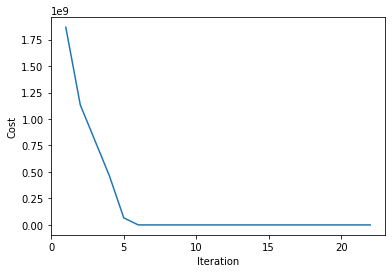

[[-4.26621170e-05 -3.37429869e-05  2.97654979e-05 -1.41730892e-04
  -1.46126984e-04  1.14365659e-04 -2.54293474e-04 -4.72628547e-04
   2.80308044e-04 -4.63919366e-05 -1.63761910e-05  1.54697273e-05]
 [-1.87082202e-04 -3.73877850e-05  3.41650690e-05 -7.32162243e-04
  -7.97445068e-05  6.92385065e-05  1.84090520e-05 -1.38640873e-05
   9.33075792e-06  1.82518365e-04  5.52898274e-05 -4.20195134e-05]
 [ 9.93160752e-04  9.39475660e-04 -6.05929099e-04  1.09556252e-05
  -1.83573939e-08 -1.42903983e-06  2.30896399e-05  2.35274476e-05
  -1.89707369e-05  3.86508926e-05  8.30879208e-05 -6.09737524e-05]]
[[-0.00054171 -0.00034684  0.000336  ]]


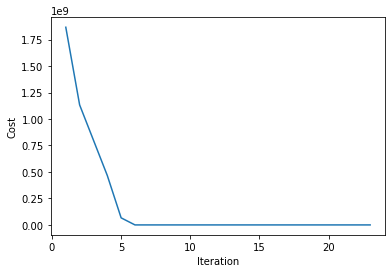

[[-4.14097232e-05 -3.30894741e-05  2.93576644e-05 -1.36889240e-04
  -1.43413089e-04  1.12678905e-04 -2.39825531e-04 -4.63431634e-04
   2.74760913e-04 -4.53033780e-05 -1.59641207e-05  1.52217620e-05]
 [-1.83069092e-04 -3.61881070e-05  3.34721934e-05 -7.17421095e-04
  -7.61771829e-05  6.72764002e-05  1.82298880e-05 -1.38239274e-05
   9.31340357e-06  1.78876301e-04  5.35574572e-05 -4.08020824e-05]
 [ 9.68839894e-04  9.22908585e-04 -5.94345089e-04  1.07758458e-05
  -6.93528990e-08 -1.38599464e-06  2.25536462e-05  2.31935348e-05
  -1.87107471e-05  3.75265676e-05  8.21205230e-05 -6.02165524e-05]]
[[-0.00052707 -0.00033959  0.00033149]]


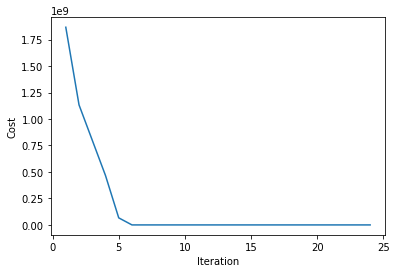

[[-4.02059054e-05 -3.24276277e-05  2.89654255e-05 -1.32262673e-04
  -1.40668755e-04  1.11056704e-04 -2.26196971e-04 -4.54163632e-04
   2.69431756e-04 -4.42449057e-05 -1.55440684e-05  1.49845782e-05]
 [-1.79143339e-04 -3.49579073e-05  3.28134424e-05 -7.02931126e-04
  -7.24962100e-05  6.54240173e-05  1.80395480e-05 -1.37859232e-05
   9.29607631e-06  1.75287175e-04  5.17932199e-05 -3.96296859e-05]
 [ 9.45210641e-04  9.06125765e-04 -5.83162864e-04  1.05956046e-05
  -1.22041195e-07 -1.34453303e-06  2.20286294e-05  2.28548423e-05
  -1.84590439e-05  3.64376665e-05  8.11426357e-05 -5.94823972e-05]]
[[-0.00051295 -0.00033225  0.00032716]]


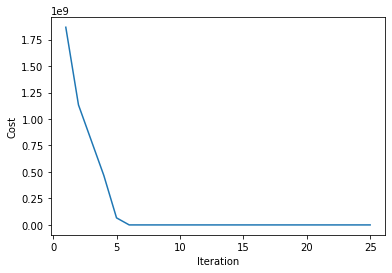

[[-3.90499150e-05 -3.17583643e-05  2.85871940e-05 -1.27846107e-04
  -1.37897843e-04  1.09490883e-04 -2.13378376e-04 -4.44838207e-04
   2.64278704e-04 -4.32169177e-05 -1.51165898e-05  1.47571815e-05]
 [-1.75308389e-04 -3.36987256e-05  3.21855660e-05 -6.88710582e-04
  -6.87058788e-05  6.36706024e-05  1.78396804e-05 -1.37501462e-05
   9.27823570e-06  1.71756932e-04  4.99995067e-05 -3.85028436e-05]
 [ 9.22276800e-04  8.89150608e-04 -5.72377861e-04  1.04155675e-05
  -1.76353632e-07 -1.30476402e-06  2.15153699e-05  2.25118484e-05
  -1.82156030e-05  3.53846620e-05  8.01556763e-05 -5.87709889e-05]]
[[-0.00049935 -0.00032482  0.00032298]]


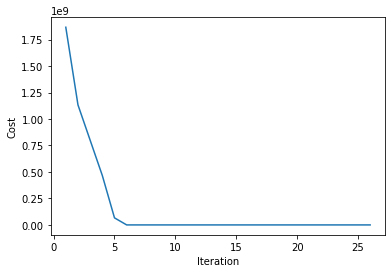

[[-3.79407335e-05 -3.10826437e-05  2.82224597e-05 -1.23633433e-04
  -1.35104369e-04  1.07980052e-04 -2.01337085e-04 -4.35469392e-04
   2.59303245e-04 -4.22195543e-05 -1.46822836e-05  1.45391013e-05]
 [-1.71566703e-04 -3.24122711e-05  3.15869144e-05 -6.74774063e-04
  -6.48111191e-05  6.20103610e-05  1.76318311e-05 -1.37166546e-05
   9.26012211e-06  1.68290548e-04  4.81788805e-05 -3.74182088e-05]
 [ 9.00037746e-04  8.72007656e-04 -5.61965455e-04  1.02363264e-05
  -2.32212051e-07 -1.26653362e-06  2.10144814e-05  2.21650569e-05
  -1.79799275e-05  3.43677272e-05  7.91611185e-05 -5.80811211e-05]]
[[-0.00048624 -0.00031731  0.00031896]]


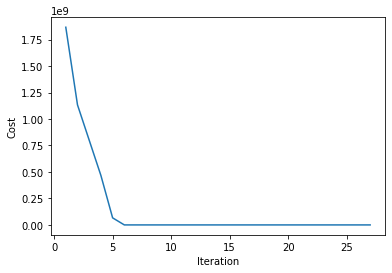

[[-3.68771284e-05 -3.04014628e-05  2.78704461e-05 -1.19617767e-04
  -1.32292483e-04  1.06520967e-04 -1.90038179e-04 -4.26071485e-04
   2.54494026e-04 -4.12527344e-05 -1.42417887e-05  1.43297620e-05]
 [-1.67919873e-04 -3.11004135e-05  3.10155483e-05 -6.61132853e-04
  -6.08174777e-05  6.04367003e-05  1.74174355e-05 -1.36854940e-05
   9.24172584e-06  1.64892087e-04  4.63340570e-05 -3.63738521e-05]
 [ 8.78488986e-04  8.54722420e-04 -5.51908908e-04  1.00584010e-05
  -2.89529576e-07 -1.22977792e-06  2.05264235e-05  2.18149934e-05
  -1.77516973e-05  3.33867697e-05  7.81604799e-05 -5.74119391e-05]]
[[-0.00047364 -0.00030973  0.00031508]]


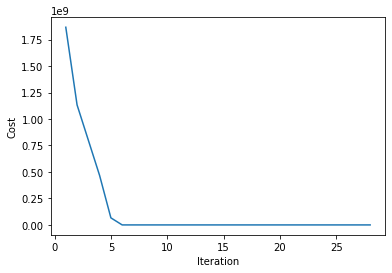

[[-3.58577024e-05 -2.97158501e-05  2.75305206e-05 -1.15791662e-04
  -1.29466439e-04  1.05111187e-04 -1.79445341e-04 -4.16658955e-04
   2.49844217e-04 -4.03161897e-05 -1.37957801e-05  1.41286727e-05]
 [-1.64368728e-04 -2.97651727e-05  3.04698050e-05 -6.47795251e-04
  -5.67310872e-05  5.89439435e-05  1.71978139e-05 -1.36566976e-05
   9.22310720e-06  1.61564772e-04  4.44678838e-05 -3.53676079e-05]
 [ 8.57622701e-04  8.37321194e-04 -5.42190590e-04  9.88224186e-06
  -3.48211508e-07 -1.19441300e-06  2.00515165e-05  2.14622007e-05
  -1.75305653e-05  3.24414668e-05  7.71553099e-05 -5.67625452e-05]]
[[-0.00046152 -0.0003021   0.00031134]]


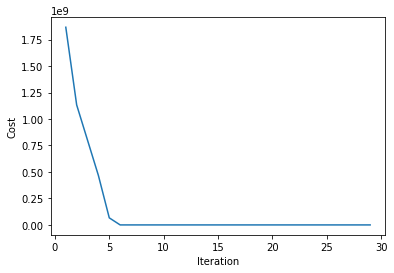

[[-3.48809373e-05 -2.90268582e-05  2.72020656e-05 -1.12147293e-04
  -1.26630569e-04  1.03748251e-04 -1.69521561e-04 -4.07246334e-04
   2.45346237e-04 -3.94094971e-05 -1.33449646e-05  1.39353656e-05]
 [-1.60913435e-04 -2.84087053e-05  2.99481111e-05 -6.34766904e-04
  -5.25586272e-05  5.75267509e-05  1.69741705e-05 -1.36302863e-05
   9.20430051e-06  1.58311060e-04  4.25833183e-05 -3.43975579e-05]
 [ 8.37428274e-04  8.19830862e-04 -5.32794516e-04  9.70823445e-06
  -4.08156303e-07 -1.16036756e-06  1.95899564e-05  2.11072340e-05
  -1.73162176e-05  3.15312993e-05  7.61471763e-05 -5.61321142e-05]]
[[-0.00044986 -0.00029442  0.00030772]]


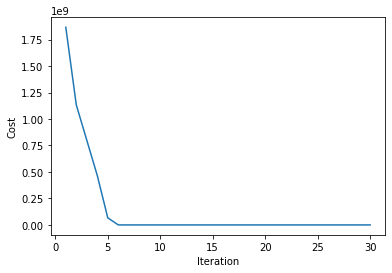

[[-3.39452317e-05 -2.83355577e-05  2.68845118e-05 -1.08676616e-04
  -1.23789255e-04  1.02429904e-04 -1.60229735e-04 -3.97848118e-04
   2.40993261e-04 -3.85321071e-05 -1.28900758e-05  1.37494099e-05]
 [-1.57553600e-04 -2.70332899e-05  2.94490221e-05 -6.22051137e-04
  -4.83072779e-05  5.61802347e-05  1.67475959e-05 -1.36062692e-05
   9.18534277e-06  1.55132718e-04  4.06834036e-05 -3.34618756e-05]
 [ 8.17892777e-04  8.02278694e-04 -5.23705497e-04  9.53670411e-06
  -4.69256597e-07 -1.12757287e-06  1.91418305e-05  2.07506566e-05
  -1.71083538e-05  3.06555848e-05  7.51376530e-05 -5.55198558e-05]]
[[-0.00043866 -0.00028671  0.00030422]]


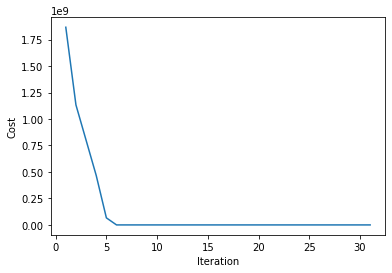

[[-3.30489340e-05 -2.76430292e-05  2.65773247e-05 -1.05371504e-04
  -1.20946897e-04  1.01154018e-04 -1.51533146e-04 -3.88478659e-04
   2.36778756e-04 -3.76833703e-05 -1.24318691e-05  1.35704039e-05]
 [-1.54288356e-04 -2.56413103e-05  2.89711977e-05 -6.09649261e-04
  -4.39846662e-05  5.48998766e-05  1.65190702e-05 -1.35846442e-05
   9.16626590e-06  1.52030909e-04  3.87712447e-05 -3.25588581e-05]
 [ 7.99001420e-04  7.84692147e-04 -5.14909295e-04  9.36792109e-06
  -5.31400276e-07 -1.09596516e-06  1.87071322e-05  2.03930352e-05
  -1.69066912e-05  2.98135089e-05  7.41283065e-05 -5.49250224e-05]]
[[-0.0004279  -0.00027898  0.00030085]]


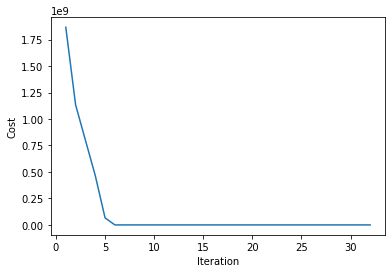

[[-3.21903694e-05 -2.69503561e-05  2.62800042e-05 -1.02223852e-04
  -1.18107881e-04  9.99185996e-05 -1.43395848e-04 -3.79152069e-04
   2.32696578e-04 -3.68625604e-05 -1.19711160e-05  1.33979740e-05]
 [-1.51116449e-04 -2.42352374e-05  2.85133963e-05 -5.97560869e-04
  -3.95988062e-05  5.36815068e-05  1.62894687e-05 -1.35653987e-05
   9.14709927e-06  1.49006257e-04  3.68499842e-05 -3.16869063e-05]
 [ 7.80737957e-04  7.67098662e-04 -5.06392495e-04  9.20210587e-06
  -5.94471547e-07 -1.06548450e-06  1.82857748e-05  2.00349353e-05
  -1.67109624e-05  2.90041525e-05  7.31206843e-05 -5.43469038e-05]]
[[-0.00041756 -0.00027124  0.00029758]]


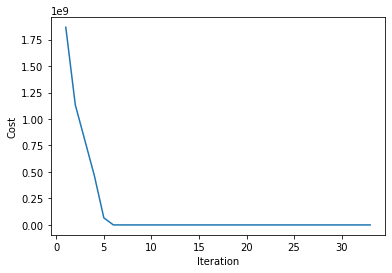

[[-3.13678624e-05 -2.62586173e-05  2.59920813e-05 -9.92256686e-05
  -1.15276555e-04  9.87217745e-05 -1.35782963e-04 -3.69882120e-04
   2.28740914e-04 -3.60688942e-05 -1.15085985e-05  1.32317724e-05]
 [-1.48036308e-04 -2.28176102e-05  2.80744658e-05 -5.85784096e-04
  -3.51580347e-05  5.25212698e-05  1.60595678e-05 -1.35485100e-05
   9.12786936e-06  1.46058926e-04  3.49227774e-05 -3.08445200e-05]
 [ 7.63085047e-04  7.49525462e-04 -4.98142462e-04  9.03943431e-06
  -6.58352006e-07 -1.03607481e-06  1.78776047e-05  1.96769168e-05
  -1.65209147e-05  2.82265177e-05  7.21163030e-05 -5.37848256e-05]]
[[-0.00040762 -0.00026351  0.00029441]]
QUITTING!!!


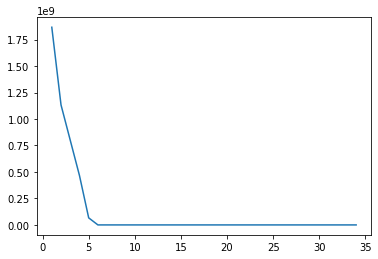

In [113]:
Progress = {"Cost":[], "Iteration":[]}
i = 1
try:
    while True:
        Progress['Cost'].append(calcCost())
        Progress['Iteration'].append(i)
        w_Corr = correctionWeightsTerms()
        b_Corr = correctionBTerms()
        
        w_Corr = w_Corr.reshape(3, 12) * learning_rates
        b_Corr *= learning_rates_b
        
        weights -= w_Corr.reshape(12, 3)
        b_vals -= b_Corr
        
        print(w_Corr)
        print(b_Corr)
        
        sns.lineplot(data=Progress, x="Iteration", y="Cost")
        plt.show()
        i += 1
        
except KeyboardInterrupt:
    print("QUITTING!!!")

In [114]:
for expected, actual in zip(getExpected(), data['Lab']):
    print(expected, ideal_vals[str(int(actual))])

[0.47293098 0.08466029 0.0262331 ] [1, 0, 0]
[0.60164012 0.19820599 0.07609188] [1, 0, 0]
[0.49475336 0.15105023 0.05702239] [1, 0, 0]
[0.48796449 0.17357365 0.07691581] [1, 0, 0]
[0.40123719 0.06859993 0.0220769 ] [1, 0, 0]
[0.33802394 0.03079942 0.00927171] [1, 0, 0]
[0.38701978 0.10657987 0.04187932] [1, 0, 0]
[0.4781546  0.10315438 0.03587121] [1, 0, 0]
[0.51408572 0.228023   0.11004358] [1, 0, 0]
[0.56294746 0.17071056 0.06693457] [1, 0, 0]
[0.46106327 0.05218197 0.0142155 ] [1, 0, 0]
[0.4163516  0.10339041 0.04153381] [1, 0, 0]
[0.57790729 0.19825938 0.07977108] [1, 0, 0]
[0.48757099 0.20595044 0.08837636] [1, 0, 0]
[0.46030613 0.02285594 0.00423204] [1, 0, 0]
[0.18751337 0.00599904 0.00146882] [1, 0, 0]
[0.37325015 0.03193736 0.00777637] [1, 0, 0]
[0.47159494 0.08511832 0.02624603] [1, 0, 0]
[0.48839564 0.03884448 0.00979562] [1, 0, 0]
[0.32587236 0.04178142 0.01328187] [1, 0, 0]
[0.57479087 0.09857157 0.03099466] [1, 0, 0]
[0.37079651 0.05410638 0.01712031] [1, 0, 0]
[0.3339770